In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_orig = pd.read_csv('Mall_Customers.csv')

In [3]:
df = df_orig.copy()

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Spending Score is something you assign to the customer
# based on your defined parameters like customer behavior and purchasing data.

In [6]:
# do some EDA and see interesting things about features

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


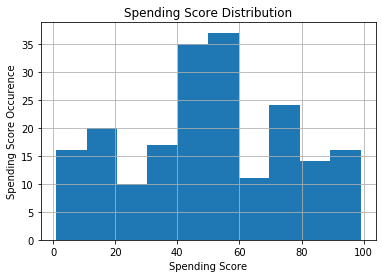

In [8]:
# See Spending Distribution
df['Spending Score (1-100)'].hist();
plt.title('Spending Score Distribution');
plt.ylabel('Spending Score Occurence');
plt.xlabel('Spending Score');

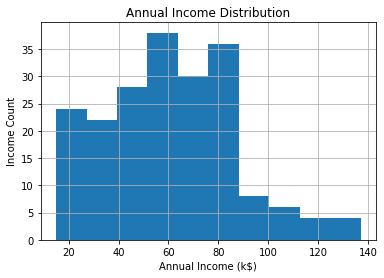

In [9]:
# See income Distribution
df['Annual Income (k$)'].hist();
plt.title('Annual Income Distribution');
plt.ylabel('Income Count');
plt.xlabel('Annual Income (k$)');

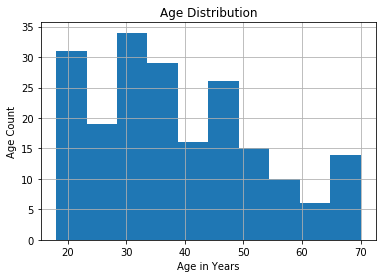

In [10]:
# See age distribution
df['Age'].hist()
plt.title('Age Distribution');
plt.ylabel('Age Count');
plt.xlabel('Age in Years');

In [11]:
# Check to see if there is an imbalance
df['Gender'].value_counts(True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [12]:
# see how many records are in the dataset
df.shape

(200, 5)

In [13]:
# There are only 200 records in the dataset
# see the customer age range
df.sort_values(by = 'Age',ascending=True)
# The customer age range is from 18-70

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
114,115,Female,18,65,48
91,92,Male,18,59,41
65,66,Male,18,48,59
33,34,Male,18,33,92
0,1,Male,19,15,39
162,163,Male,19,81,5
138,139,Male,19,74,10
115,116,Female,19,65,50
113,114,Male,19,64,46
111,112,Female,19,63,54


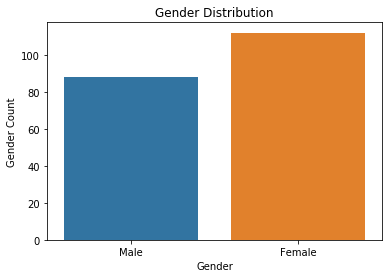

In [14]:
sns.countplot(x='Gender', data=df);
plt.title('Gender Distribution');
plt.ylabel('Gender Count');

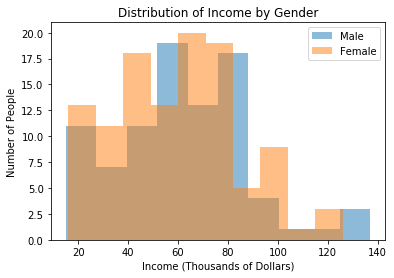

In [15]:
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.ylabel('Number of People')
plt.legend();

In [44]:
# Group by age and see the average spending score
avg_age_spd_scr = df.groupby(['Age','Gender','Spending Score (1-100)']).agg({'Annual Income (k$)':'mean'}).reset_index()

In [45]:
avg_age_spd_scr.head()

,Age,Gender,Spending Score (1-100),Annual Income (k$)
0,18,Female,48,65.0
1,18,Male,41,59.0
2,18,Male,59,48.0
3,18,Male,92,33.0
4,19,Female,50,65.0


In [46]:
avg_age_spd_scr[avg_age_spd_scr['Gender'] == "Female"]

,Age,Gender,Spending Score (1-100),Annual Income (k$)
0,18,Female,48,65.0
4,19,Female,50,65.0
5,19,Female,54,63.0
12,20,Female,6,16.0
13,20,Female,75,37.0
17,21,Female,42,62.0
18,21,Female,57,54.0
19,21,Female,73,30.0
20,21,Female,81,33.0
22,22,Female,55,57.0


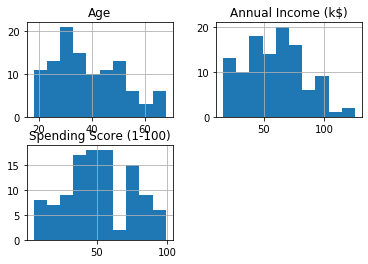

In [48]:
avg_age_spd_scr[avg_age_spd_scr['Gender'] == "Female"].hist();

In [49]:
avg_age_spd_scr.Age.mean()

38.857142857142854

In [50]:
avg_age_spd_scr['Spending Score (1-100)'].mean()

50.13775510204081

In [51]:
df['Spending Score (1-100)'].mean()

50.2

In [52]:
avg_age_spd_scr

,Age,Gender,Spending Score (1-100),Annual Income (k$)
0,18,Female,48,65.0
1,18,Male,41,59.0
2,18,Male,59,48.0
3,18,Male,92,33.0
4,19,Female,50,65.0
5,19,Female,54,63.0
6,19,Male,5,81.0
7,19,Male,10,74.0
8,19,Male,39,15.0
9,19,Male,46,64.0
